In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_scoreconda 


SyntaxError: invalid syntax (263948772.py, line 20)

In [ ]:
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")

In [ ]:
print(df)

In [ ]:
import pandas as pd

# Veriyi yükleme
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")

# Veri setinin boyutunu almak
print("Veri setinin boyutu:", df.shape)


# Veri setinin temel bilgilerini göstermek
print("\nVeri setinin bilgileri:")
print(df.info())

# "kmpl", "cc", "bhp" ifadelerini içeren sütunları kaldırmak
df.drop(columns=["Mileage", "Engine", "Power"], inplace=True)

# Sayısal sütunların istatistiksel özetini almak
print("\nSayısal sütunların istatistiksel özeti:")
print(df.describe(include='number'))


In [ ]:
import pandas as pd

# Veriyi yükleme
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")

# Eksik değerleri kontrol etme
print("Eksik değerlerin sayısı:")
print(df.isna().sum())

# Gereksiz sütunları kaldırma
df.drop(columns=['Unnamed: 0', 'New_Price'], inplace=True) #Kullanılmayacak olan "Adsız: 0" sütunu ve çok fazla eksik veri içeren "Yeni_Fiyat" sütunu kaldırıldı.

# Tekrar eden gözlemleri kontrol etme
print("Tekrar eden gözlemlerin sayısı:")
print(df.duplicated().sum())
# df[df.duplicated(keep=False)]

# Tekrar eden gözlemleri görüntüleme (gerektiğinde)
# df[df.duplicated(keep=False)]


In [ ]:
import pandas as pd

# Veriyi yükleme
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")


# Yinelenen veri yok. Şimdi "Kilometre", "Motor", "Güç" sütunlarının veri türlerini düzeltelim.


# 'Mileage' sütunundaki sayısal değerleri almak ve float türüne dönüştürmek
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)

# 'Engine' sütunundaki sayısal değerleri almak ve float türüne dönüştürmek
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

# 'Power' sütunundaki 'null bhp' ifadelerini uygun şekilde ele almak
df['Power'] = df['Power'].replace('null bhp', None)
print('Veride "null bhp" olarak görünen veri sayısı:', (df['Power'] == 'null bhp').sum())

# 'Power' sütunundan sayısal değerleri almak ve float türüne dönüştürmek
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

# Veri setinin ilk 5 satırına göz atma
print(df.head())




In [ ]:
import pandas as pd

# Veriyi yükleme
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")
df.isna().sum()

In [ ]:
import pandas as pd

# Veriyi yükleme
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")
   
# 'Mileage' sütunundaki sayısal değerleri almak ve float türüne dönüştürmek
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
# 'Engine' sütunundaki sayısal değerleri almak ve float türüne dönüştürmek
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)
# 'Power' sütunundaki 'null bhp' ifadelerini uygun şekilde ele almak
df['Power'] = df['Power'].replace('null bhp', None)
print('Veride "null bhp" olarak görünen veri sayısı:', (df['Power'] == 'null bhp').sum())
# 'Power' sütunundan sayısal değerleri almak ve float türüne dönüştürmek
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

# Sütundaki eksik değerlerin ortalama değerler ile doldurulması için sütundaki değerleri floata (sayısal bir tür) çevirmek gerekmektedir.



# 'Mileage' sütunundaki eksik değerleri ortalama değerle doldurma
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())

# 'Engine' sütunundaki eksik değerleri ortalama değerle doldurma
df['Engine'] = df['Engine'].fillna(df['Engine'].mean())

# 'Power' sütunundaki eksik değerleri ortalama değerle doldurma
df['Power'] = df['Power'].fillna(df['Power'].mean())

# 'Seats' sütunundaki eksik değerleri ortalama değerle doldurma
df['Seats'] = df['Seats'].fillna(df['Seats'].mean())


df.drop(columns=["New_Price"], inplace=True)
# New_Price sütununu çıkardık.


print(df.isna().sum())

In [ ]:
import pandas as pd
from scipy import stats

# Veriyi yükleme
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")

print (df.shape) # (6019, 14)


# Z-Skorunu Hesaplama
Z_skorları = stats.zscore(df["Kilometers_Driven"])

# Z-Skorunu Kullanarak Aykırı Değerleri Tanımlama
eşik_değeri = 2.5  # Genellikle 2.5 veya 3 seçilebilir
aykırılar = df['Kilometers_Driven'][abs(Z_skorları) > eşik_değeri]

# Aykırı Değerleri Gösterme
print("Aykırı Değerler:")
print(aykırılar)





# Veri setinden 300.000'in üzerindeki kilometre sürüş verilerini içeren gözlemleri çıkarın
df = df[df["Kilometers_Driven"] <= 300000]

# "Seats" sütununun minimum değerini bulma
minimum_seats = df["Seats"].min()

# En az koltuk sayısını yazdırma
print("Minimum koltuk sayısı:", minimum_seats) # Minimum koltuk sayısı: 0.0




df = df[df['Seats'] != 0]

# Bu kod, "Seats" sütununda 0 koltuklu araçları içermeyen gözlemleri seçer ve bu şekilde veri setinden çıkarır.

print(df)



In [ ]:
df.sample()


In [ ]:
import pandas as pd
from scipy import stats

# Veriyi yükleme
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")


# Veri setindeki benzersiz araç ismi sayısını bulma
df['Name'].nunique()

# Veri setinden rastgele bir örneği görüntüleme
ornek = df.sample()


# 'Company' sütununu oluşturma: Araç isimlerinin ilk kelimesini alarak üretici firmayı çıkarma
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()


# 'Model' sütununu oluşturma: Araç isimlerinin ilk iki kelimesini birleştirerek modeli çıkarma
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()


# 'Name' sütununu kaldırma
df.drop(columns=['Name'], inplace=True)

print(df)



df['Company'].nunique() , df['Model'].nunique()



new_order = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission',
             'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df = df.reindex(columns=new_order)

print(df)



In [ ]:
import pandas as pd
from scipy import stats

# Veriyi yükleme
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")


# Veri setindeki benzersiz araç ismi sayısını bulma
df['Name'].nunique()

df.sample()

df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()

df.drop(columns=['Name'], inplace=True)

print(df)

df['Company'].nunique() , df['Model'].nunique()



# Görselleştirme


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")
# Gereksiz sütunları kaldırma
df.drop(columns=['Unnamed: 0', 'New_Price'],
        inplace=True)  # Kullanılmayacak olan "Adsız: 0" sütunu ve çok fazla eksik veri içeren "Yeni_Fiyat" sütunu kaldırıldı.
# 'Mileage' sütunundaki sayısal değerleri almak ve float türüne dönüştürmek
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
# 'Engine' sütunundaki sayısal değerleri almak ve float türüne dönüştürmek
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)
# 'Power' sütunundaki 'null bhp' ifadelerini uygun şekilde ele almak
df['Power'] = df['Power'].replace('null bhp', None)
####print('Veride "null bhp" olarak görünen veri sayısı:', (df['Power'] == 'null bhp').sum())
# 'Power' sütunundan sayısal değerleri almak ve float türüne dönüştürmek
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)
# 'Mileage' sütunundaki eksik değerleri ortalama değerle doldurma
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
# 'Engine' sütunundaki eksik değerleri ortalama değerle doldurma
df['Engine'] = df['Engine'].fillna(df['Engine'].mean())
# 'Power' sütunundaki eksik değerleri ortalama değerle doldurma
df['Power'] = df['Power'].fillna(df['Power'].mean())
# 'Seats' sütunundaki eksik değerleri ortalama değerle doldurma
df['Seats'] = df['Seats'].fillna(df['Seats'].mean())
# Z-Skorunu Hesaplama
Z_skorları = stats.zscore(df["Kilometers_Driven"])
# Z-Skorunu Kullanarak Aykırı Değerleri Tanımlama
eşik_değeri = 2.5  # Genellikle 2.5 veya 3 seçilebilir
aykırılar = df['Kilometers_Driven'][abs(Z_skorları) > eşik_değeri]
# Veri setinden 300.000'in üzerindeki kilometre sürüş verilerini içeren gözlemleri çıkarın
df = df[df["Kilometers_Driven"] <= 300000]
# "Seats" sütununun minimum değerini bulma
minimum_seats = df["Seats"].min()
df = df[df['Seats'] != 0]
# 'Company' sütununu oluşturma: Araç isimlerinin ilk kelimesini alarak üretici firmayı çıkarma
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
# 'Model' sütununu oluşturma: Araç isimlerinin ilk iki kelimesini birleştirerek modeli çıkarma
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
# 'Name' sütununu kaldırma
df.drop(columns=['Name'], inplace=True)
df['Company'].nunique(), df['Model'].nunique()

(30, 215)

*COMPANY*

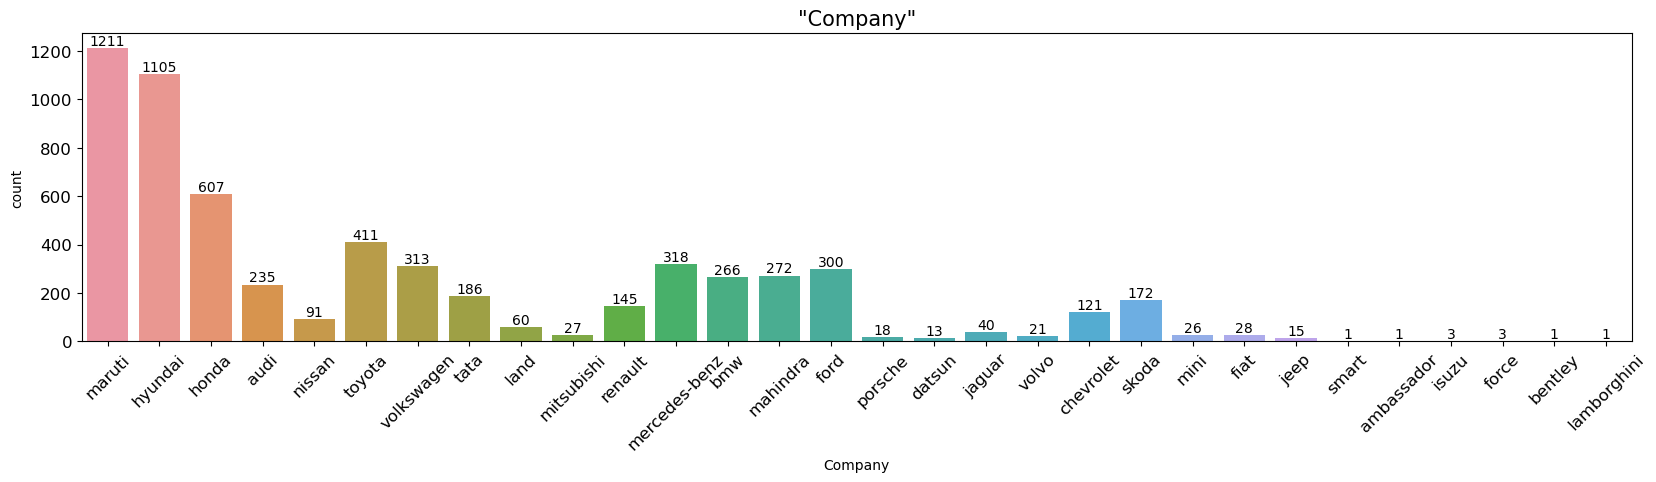

In [15]:
plt.figure(figsize=(20, 4), dpi=100)
graph = sns.countplot(data=df, x='Company')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Company"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)  
plt.show()

In [16]:
df.Model.value_counts()

Model
maruti swift          353
honda city            269
hyundai i20           246
hyundai verna         170
toyota innova         164
                     ... 
fiat petra              1
volkswagen beetle       1
ambassador classic      1
smart fortwo            1
jaguar f                1
Name: count, Length: 215, dtype: int64

In [17]:
threshold = 10
counts = df['Model'].value_counts()
filtered_models = counts[counts >= threshold].index.tolist()
df = df[df['Model'].isin(filtered_models)]

In [18]:
df.Model.value_counts()

Model
maruti swift              353
honda city                269
hyundai i20               246
hyundai verna             170
toyota innova             164
                         ... 
tata tiago                 11
mercedes-benz gl-class     11
mercedes-benz s            10
chevrolet spark            10
hyundai getz               10
Name: count, Length: 104, dtype: int64

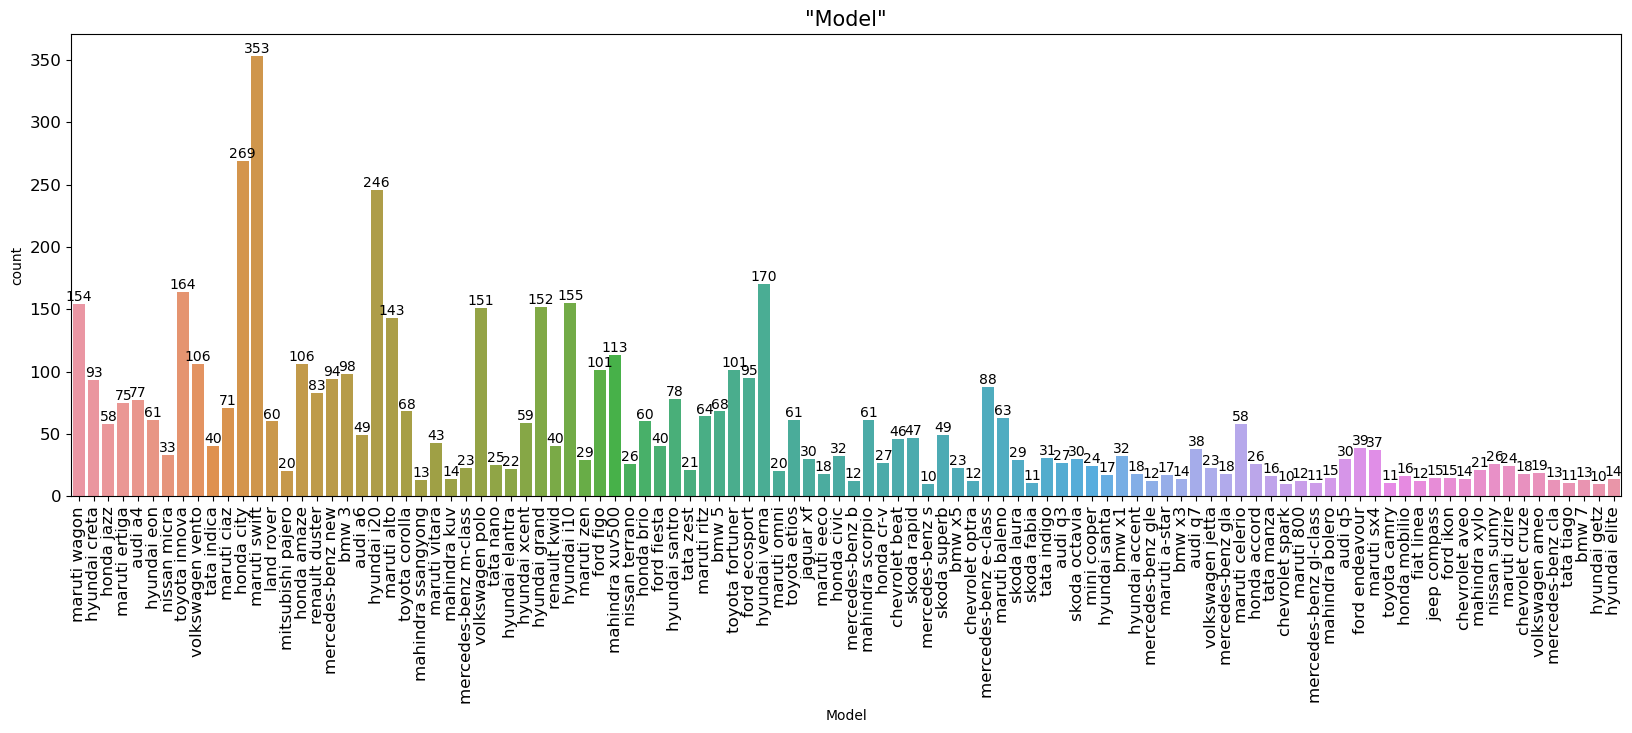

In [19]:
plt.figure(figsize=(20,6), dpi=100)
graph = sns.countplot(data=df, x='Model')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Model"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

*"Location"*

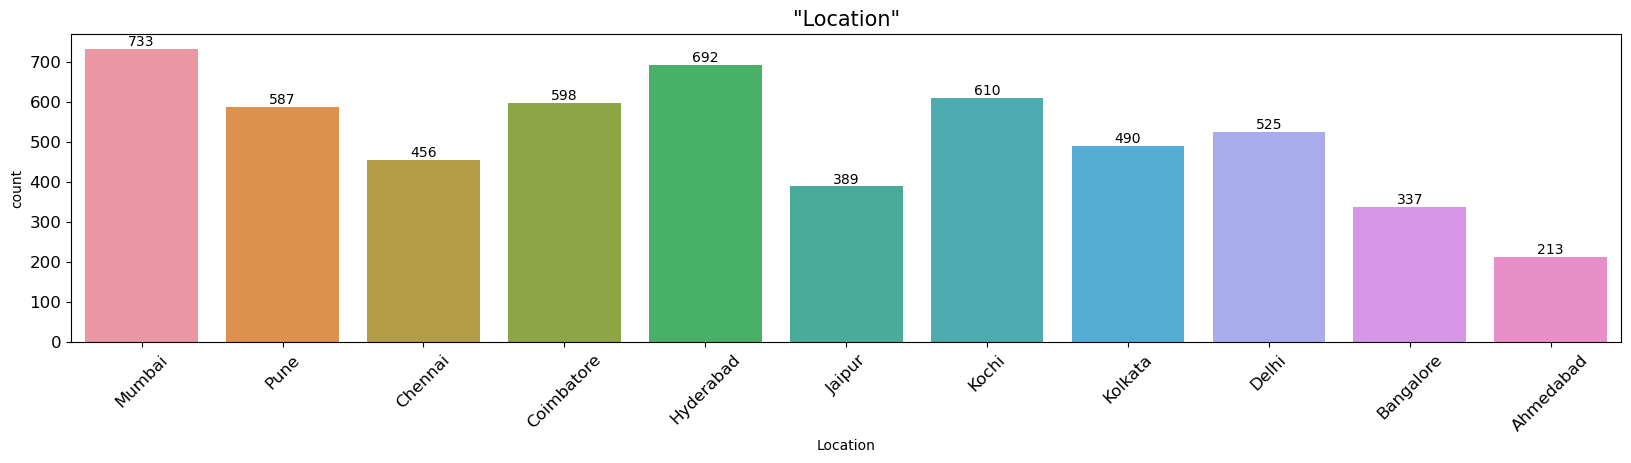

In [20]:
plt.figure(figsize=(20,4), dpi=100)
graph = sns.countplot(data=df, x='Location')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Location"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

*"Owner_Type"*

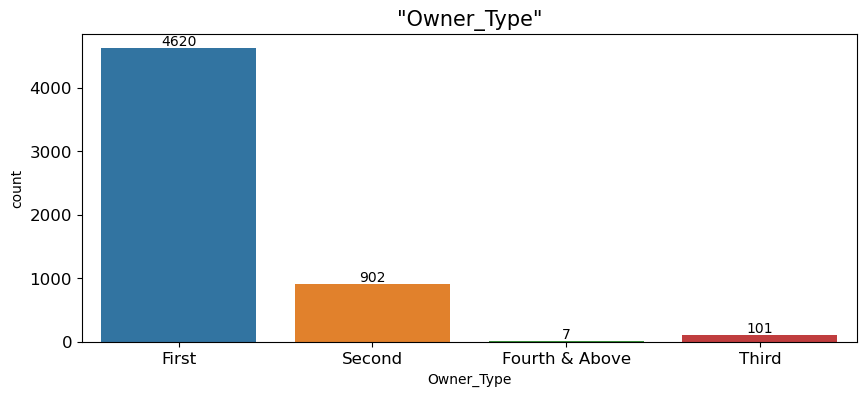

In [21]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Owner_Type')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Owner_Type"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

*Fuel_Type*

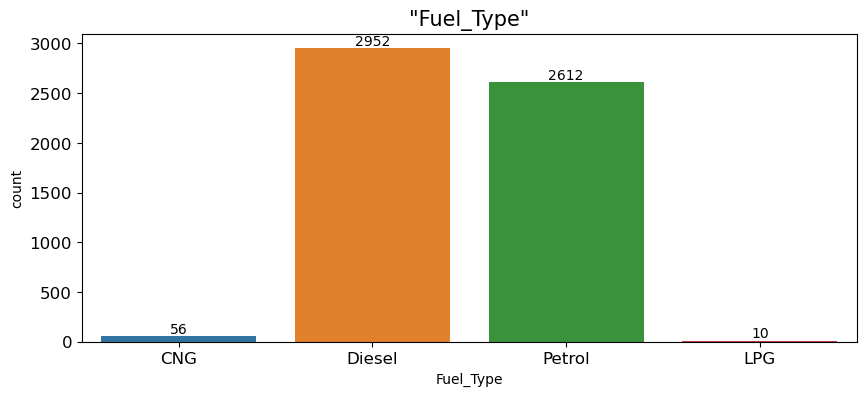

In [22]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Fuel_Type')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Fuel_Type"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

*Transmission*

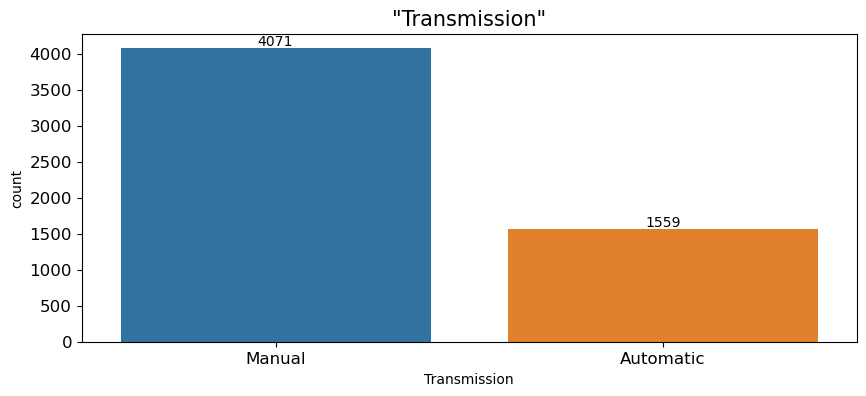

In [23]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Transmission')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Transmission"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

**Sayısal Değişkenler için Tek Değişkenli Analiz**

*"Year"*

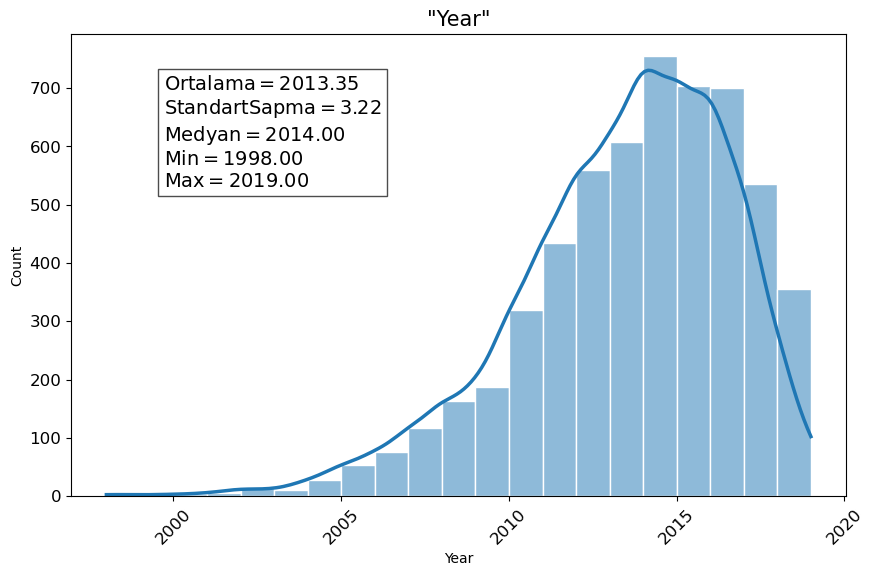

In [33]:
plt.figure(figsize=(10, 6), dpi = 100)
grap = sns.histplot(data=df, x = 'Year' , bins = 21,  # 1998-2019 arası olduğu için
                    kde = True, edgecolor = 'white' , alpha = 0.5, line_kws={'lw':2.5})

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('"Year"', fontsize=15)

textstr = '\n'.join((
    r'$\mathrm{Ortalama}=%.2f$' %df['Year'].mean(),
    r'$\mathrm{Standart Sapma}=%.2f$' %df['Year'].std(),
    r'$\mathrm{Medyan}=%.2f$' %np.median(df['Year']),
    r'$\mathrm{Min}=%.2f$' %df['Year'].min(),
    r'$\mathrm{Max}=%.2f$' %df['Year'].max()

))

plt.text(0.05, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Kilometers_Driven"*

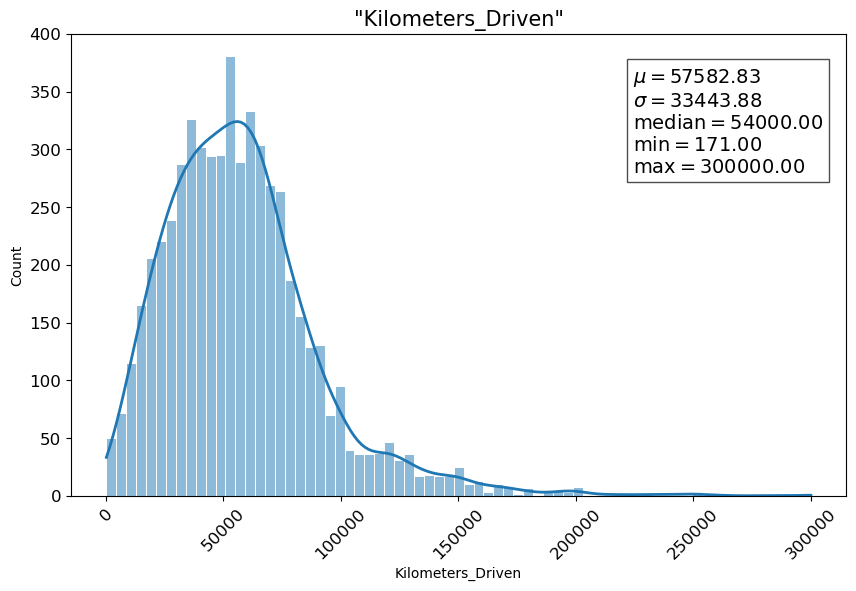

In [25]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Kilometers_Driven', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Kilometers_Driven"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Kilometers_Driven'].mean(),
    r'$\sigma=%.2f$' %df['Kilometers_Driven'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Kilometers_Driven']),
    r'$\mathrm{min}=%.2f$' %df['Kilometers_Driven'].min(),
    r'$\mathrm{max}=%.2f$' %df['Kilometers_Driven'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Mileage"*

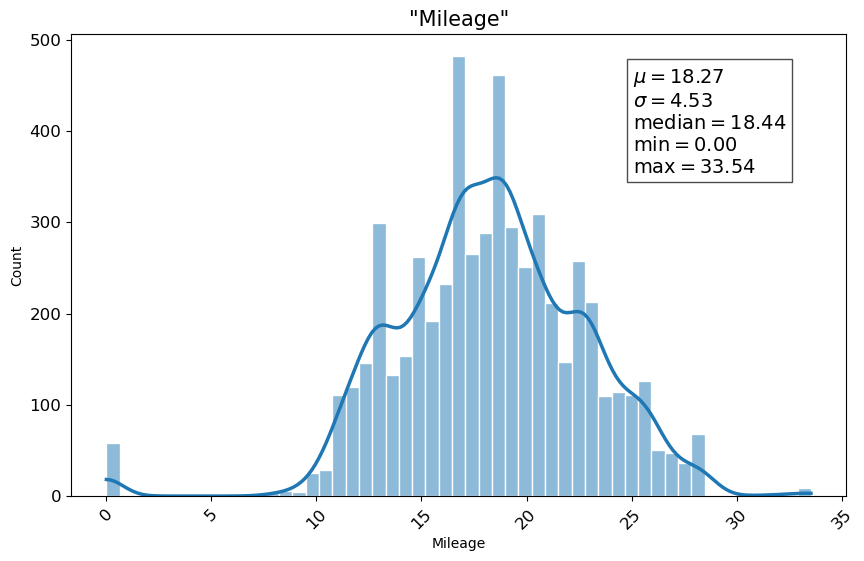

In [26]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Mileage', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Mileage"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Mileage'].mean(),
    r'$\sigma=%.2f$' %df['Mileage'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Mileage']),
    r'$\mathrm{min}=%.2f$' %df['Mileage'].min(),
    r'$\mathrm{max}=%.2f$' %df['Mileage'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Engine"*

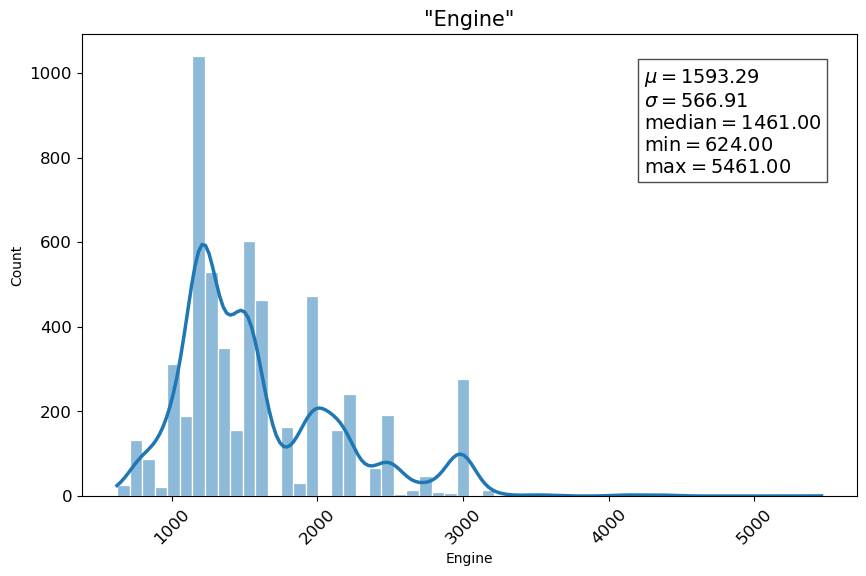

In [27]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Engine', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Engine"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Engine'].mean(),
    r'$\sigma=%.2f$' %df['Engine'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Engine']),
    r'$\mathrm{min}=%.2f$' %df['Engine'].min(),
    r'$\mathrm{max}=%.2f$' %df['Engine'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Power"*

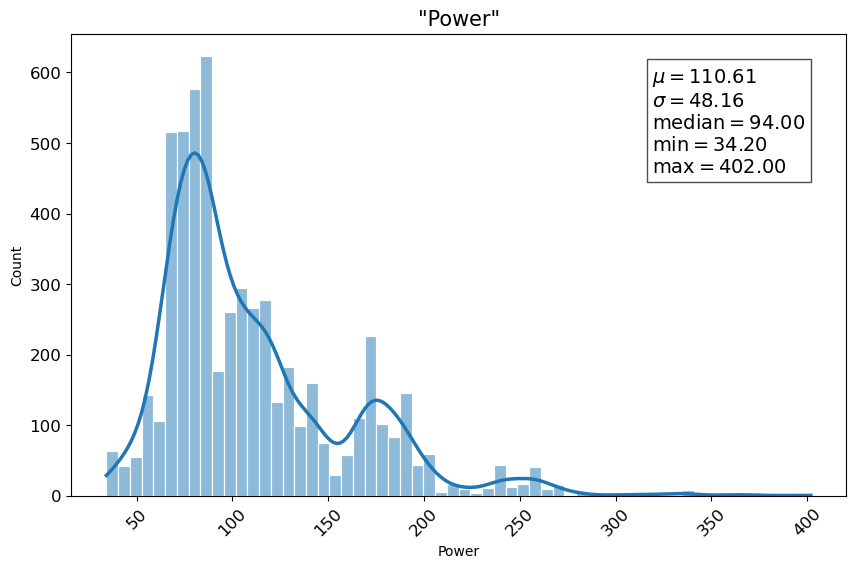

In [28]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Power', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Power"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Power'].mean(),
    r'$\sigma=%.2f$' %df['Power'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Power']),
    r'$\mathrm{min}=%.2f$' %df['Power'].min(),
    r'$\mathrm{max}=%.2f$' %df['Power'].max()
))

plt.text(0.75, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Seats"*

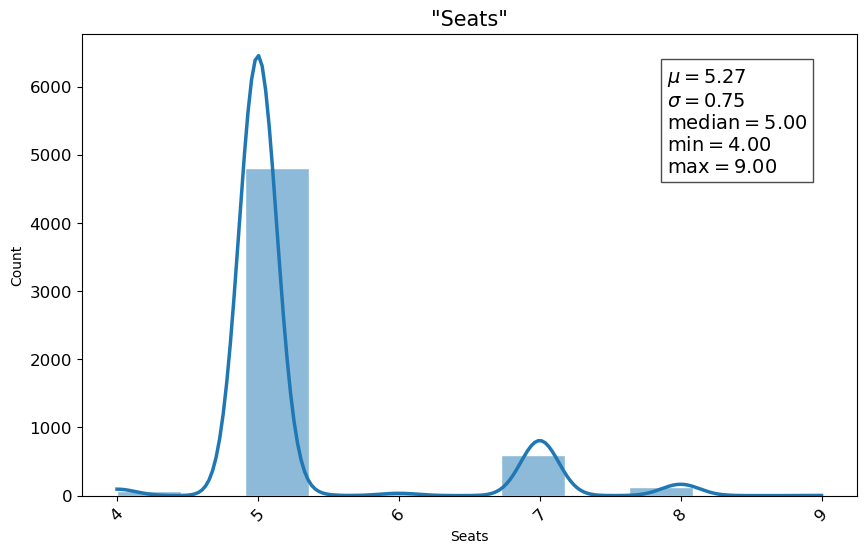

In [29]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Seats', bins=11, kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Seats"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Seats'].mean(),
    r'$\sigma=%.2f$' %df['Seats'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Seats']),
    r'$\mathrm{min}=%.2f$' %df['Seats'].min(),
    r'$\mathrm{max}=%.2f$' %df['Seats'].max()
))

plt.text(0.755, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()


*"Price"*

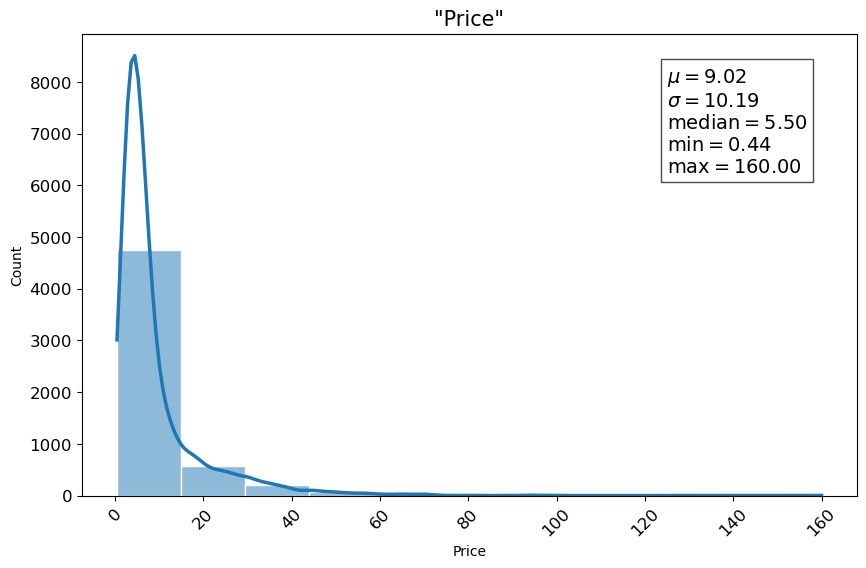

In [30]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Price', bins=11, kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Price"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Price'].mean(),
    r'$\sigma=%.2f$' %df['Price'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Price']),
    r'$\mathrm{min}=%.2f$' %df['Price'].min(),
    r'$\mathrm{max}=%.2f$' %df['Price'].max()
))

plt.text(0.755, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()